2. 

- Accuracy: Accuracy is appropriate to measure the proportion of both true positives and true negatives in a population. A real life scenario in which accuracy would be used is a teacher wanting to know the overall proportion of correctly graded answers. Accuracy would be the best metric to use because it will balance all types of grading errors (right or wrong).
- Sensitivity: Sensitivity measures the proportion of actual positives that are correctly defined. It is important in scenarios when missing true cases (false negatives) can have bad consequences. A scenario in which sensitivity is the best metric to use is fire alarm detection. Sensitivity is the best metric to use in this case because a fire alarm should catch every single real fire, even if it means it sometimes has false alarms. Missing a real fire, a false negative, is much worse than having a false alarm, a false positive.
- Precision: Precision measures the proportion of positive identifications that are correct. A scenario to use precision in is when searching for a specific topic on Google. This is because when researching for example '2024 Toyota Corolla', users will only want information on that specific car and not general information on all Toyotas. Precision is used in this case because those searching will only care for results that are relevant and specific to this car. They won't mind missing some information on the car or other general information, as long as the results are highly accurate.
- Specificity: Specificity measures the proportion of actual negatives that are correctly identified. A scenario where specificity is the best metric is a traffic camera fining system. This system needs to only detect speeding vehicles and it is important that it doesn't identify any innocent driver as a speeder. Specificity is useful here because minimizing the false positives (incorrect fines) is more important than identifying every single car that was speeding.

ChatGPT summary:
Key Metrics and Applications
Accuracy

Measures the proportion of correct predictions (true positives + true negatives).
Examples:
Diagnosing common illnesses.
Grading multiple-choice exams.
Sensitivity (Recall)

Measures the proportion of actual positives correctly identified.
Examples:
Cancer screening.
Fire alarm detection.
Specificity

Measures the proportion of actual negatives correctly identified.
Examples:
Counterfeit currency detection.
Speeding fine detection systems.
Precision

Measures the proportion of positive identifications that were correct.
Examples:
Spam email filtering.
Google search results relevance.
Equations for Metrics
We reviewed the formulas for calculating each metric using the terms:

True Positives (TP)
True Negatives (TN)
False Positives (FP)
False Negatives (FN).
Examples of formulas:
 
https://chatgpt.com/c/673b4c69-cd24-800c-8a18-9053e108f609

In [6]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Display the first few rows to understand the structure
print(ab.head())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249     7.8    5.5    0.8      

In [7]:
# Drop unwanted columns
columns_to_drop = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_drop, errors='ignore')

# Display the structure after removing columns
print(ab_reduced.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          325 non-null    object 
 1   Author         324 non-null    object 
 2   List Price     324 non-null    float64
 3   Amazon Price   325 non-null    float64
 4   Hard_or_Paper  325 non-null    object 
 5   NumPages       323 non-null    float64
 6   Publisher      324 non-null    object 
 7   Pub year       324 non-null    float64
 8   ISBN-10        325 non-null    object 
 9   Thick          324 non-null    float64
dtypes: float64(5), object(5)
memory usage: 25.5+ KB
None


In [8]:
# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Display the shape and confirm NaN values are removed
print(f"Shape after dropping NaN: {ab_reduced_noNaN.shape}")
print(ab_reduced_noNaN.isnull().sum())


Shape after dropping NaN: (319, 10)
Title            0
Author           0
List Price       0
Amazon Price     0
Hard_or_Paper    0
NumPages         0
Publisher        0
Pub year         0
ISBN-10          0
Thick            0
dtype: int64


In [9]:
# Update data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Confirm data types
print(ab_reduced_noNaN.dtypes)


Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object


/tmp/ipykernel_52/152765266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_52/152765266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_52/152765266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq                   3             7         NaN           NaN   
mean                 NaN           NaN   18.362978     12.941034   
std                  NaN           NaN   13.976755     12.436673   
min                  NaN           NaN    1.500000      0.770000   
25%                  NaN           NaN   13.890000      8.600000   
50%                  NaN           NaN   15.000000     10.200000   
75%                  NaN           NaN   19.360000     12.560000   
max                  NaN           NaN  139.950000    139.950000   

       Hard_or_Paper    NumPages Publisher     Pub year    ISBN-10       Thick  
count            319  319.000000       319   319.000000        319  319.000000  
unique             2 

array([[<Axes: title={'center': 'Pub year'}>,
        <Axes: title={'center': 'NumPages'}>]], dtype=object)

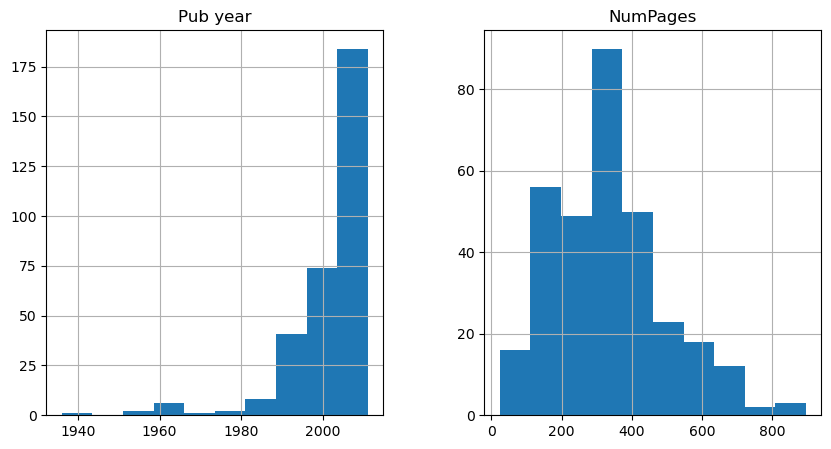

In [10]:
# Summary statistics
print(ab_reduced_noNaN.describe(include='all'))

# Value counts for categorical variables
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

# Check distributions of numerical columns
ab_reduced_noNaN[['Pub year', 'NumPages']].hist(figsize=(10, 5))


4.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load or Create a Dataset
# If you have a dataset file, replace this with pd.read_csv('path_to_file.csv')
data = {
    "List Price": [10.99, 15.49, 7.99, 20.00, 12.75, 9.50, 14.30, 8.20],
    "Hard_or_Paper": ["H", "P", "P", "H", "H", "P", "H", "P"]
}
ab_reduced_noNaN = pd.DataFrame(data)

# Step 2: Ensure No Missing Values
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Step 3: Create the 80/20 Split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Step 4: Print Dataset Sizes
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Testing set size: {len(ab_reduced_noNaN_test)} observations")


Training set size: 6 observations
Testing set size: 2 observations


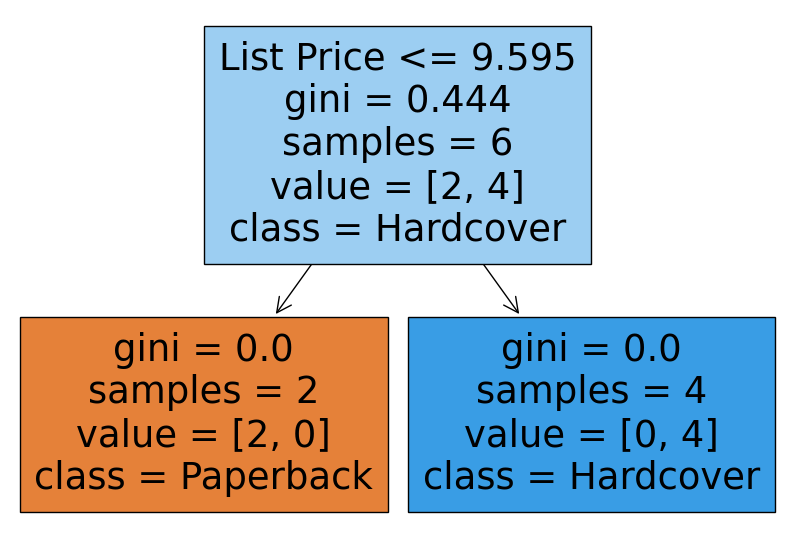

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Extract features (X) and target (y) from training data
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


The training set size has 6 observations and the testing set size has 2 observations.

The model makes predictions based on the List Price Variable. If the List Price is <= 9.595, the book is classified as a paperback. This is based on the fact that in the training data all books in the range were paperback. As for when List Price is greater than 9.595, the book is classified as a hardcover. This is also based on the fact that all books within this range in the training data were hardcover.

ChatGPT summary:
Here’s a summary of what we discussed in this session:

80/20 Train-Test Split:

You split the ab_reduced_noNaN dataset into 80% training set (6 observations) and 20% testing set (2 observations) using train_test_split from sklearn.
The split was reproducible by setting a random seed (random_state=42).
Training a Decision Tree Classifier:

You trained a DecisionTreeClassifier using the List Price variable to predict whether a book is Hardcover or Paperback.
The target variable (y) was created using pd.get_dummies, and the input feature (X) was List Price.
The decision tree was set with a max_depth=2 to limit its complexity.
Visualizing the Decision Tree:

A tree plot showed the splitting logic:
The root node splits based on List Price <= 9.595.
The left node predicts Paperback for books priced ≤ 9.595.
The right node predicts Hardcover for books priced > 9.595.
Both child nodes were pure (Gini index = 0), meaning all samples in those ranges belonged to a single class.
Predictions Based on List Price:

Predictions follow this logic:
Paperback if List Price ≤ 9.595.
Hardcover if List Price > 9.595.
Key Outputs:

Training set size: 6 observations.
Testing set size: 2 observations.
The decision tree and its predictions were visualized and explained.
https://chatgpt.com/c/673b5e5e-1668-800c-97d0-b2671769c45f

6.

In [11]:
from sklearn.model_selection import train_test_split

# Train-test split (80/20)
train_data, test_data = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Assign variables
ab_reduced_noNaN_train = train_data
ab_reduced_noNaN_test = test_data


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Define the target (y) and features (X) for the clf model
y = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # 'H' for hardcover
X = ab_reduced_noNaN_train[['List Price']]

# Initialize the classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
# Define the target (y) and features (X) for the clf2 model
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['H']  # 'H' for hardcover

# Initialize the classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X2, y2)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [19]:
# Define the test set features (X_test) and target (y_test)
X_test = ab_reduced_noNaN_test[['List Price']]
y_true = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']  # True labels

# Generate predictions
y_pred_clf = clf.predict(X_test)

Accuracy: 0.844
Sensitivity (Recall): 0.700
Specificity: 0.909


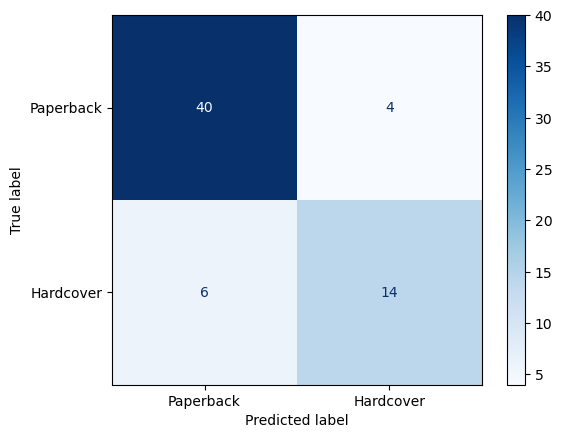

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_clf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])

# Plot the confusion matrix
cm_display.plot(cmap='Blues')

# Calculate Accuracy, Sensitivity, and Specificity
accuracy = accuracy_score(y_true, y_pred_clf)
recall = recall_score(y_true, y_pred_clf)
# Sensitivity is the same as recall in binary classification
sensitivity = recall
# Specificity = TN / (TN + FP)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)

# Print out the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


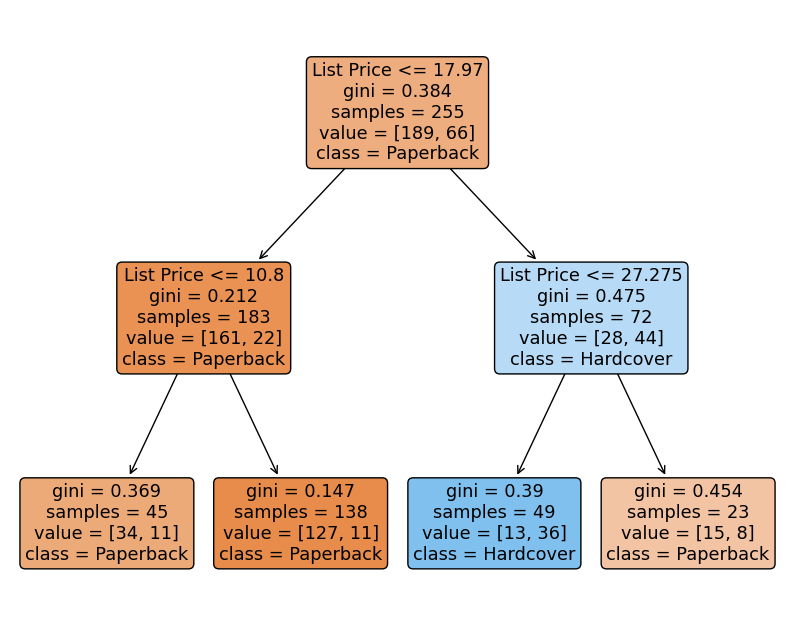

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()


Accuracy: 0.844
Sensitivity (Recall): 0.700
Specificity: 0.909

ChatGPT Summary:
Here’s a summary of our discussion:

Exploratory Data Analysis (EDA) and Preprocessing:

You started by working on an Amazon books dataset and performed data preprocessing, including:
Removing unnecessary columns (Weight_oz, Width, Height).
Dropping rows with missing values (NaNs).
Converting Pub year and NumPages to integers, and Hard_or_Paper to a categorical type.
This led to the creation of the ab_reduced_noNaN dataset, which was used for subsequent analysis.
Decision Tree Model Training:

You trained two Decision Tree Classifiers:
One model used List Price as the predictor to classify books as hardcover or paperback, with a max_depth of 2.
A second model used multiple predictors (NumPages, Thick, and List Price) to classify the books, with a max_depth of 4.
You also visualized the decision trees using tree.plot_tree(clf).
Evaluation and Metrics:

We discussed the evaluation metrics for your models:
Accuracy: 0.844 (good but can be misleading if the data is imbalanced).
Sensitivity (Recall): 0.700 (70% of hardcover books were correctly identified).
Specificity: 0.909 (90.9% of paperback books were correctly identified).
We noted that sensitivity and specificity represent a tradeoff, depending on the context of your application.
Performance Insights:

Your metrics indicate that the model is performing well, with strong specificity (few false positives) but could potentially improve sensitivity (fewer false negatives).
We discussed that the use case and whether you prioritize minimizing false positives or false negatives will dictate if the model's performance is acceptable.
Next Steps and Considerations:

We briefly touched on how to improve the recall (sensitivity), potentially by adjusting the decision threshold or using other machine learning algorithms like Random Forest or XGBoost.
Finally, I helped you understand the implications of your results and how you could proceed based on your specific goals.
https://chatgpt.com/c/673bdc5a-7ab8-800c-8e64-3b515fc63dc7

7.

The difference between the first two confusion matrices is that the first one only has one feature (List Price) for predictions, while the second one uses three features for predictions. The second matrix with multiple features is able to make more accurate predictions.The other confusion matrices (clf and clf2) are better because they display the confusion matrices and also calculates important performance metrics, such as accuracy, sensitivity and specificity. It gives a more detailed look at how effective the model is in predicting both classes (paperback and hardcover).

ChatGPT Summary:
In this session, we discussed the differences between two confusion matrices for classification models. The first matrix uses only the "List Price" feature for prediction, while the second uses multiple features ("NumPages," "Thick," and "List Price"), which likely improves the model's predictive performance. We also compared these matrices to a more comprehensive confusion matrix that includes key evaluation metrics like accuracy, sensitivity (recall), and specificity. These additional metrics offer a clearer understanding of model performance, helping to assess both the overall accuracy and the ability to correctly identify both classes (Paperback and Hardcover), which makes the latter matrix better for evaluating the model's effectiveness.
https://chatgpt.com/c/673be189-407c-800c-bcc8-a478223884f9